In [1]:
import numpy as np
import treecorr
import matplotlib.pyplot as plt
from astropy.io import fits

In [2]:
# Some plotting function
def plot_corr(r,xi,title):
    plt.figure(figsize=(8, 6))
    plt.plot(r, xi, marker='o', linestyle='-')
    plt.xscale('log')
    #plt.yscale('log')
    plt.xlabel('Separation [arcmin]')
    plt.ylabel(r'$\xi(r)$')
    plt.title(title)
    plt.grid(True)
    plt.show()
    
    
def plot_together(r,xi,title):
    plt.figure(figsize=(8, 6))
    label=['random','kids','cross']
    for i in range(3):
        plt.plot(r[i],xi[i],marker='o', linestyle='-',label=label[i])
   
    plt.xscale('log')
    #plt.yscale('log')
    plt.xlabel('Separation [arcmin]')
    plt.ylabel(r'$\xi(r)$')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

## Let's start by defining our catalogs

In [4]:
# Generate some random galaxy catalog
# In a real case, you would load your galaxy catalog here
# For demonstration purposes, let's create a random catalog
n_galaxies = 1804859
ra_min,ra_max,dec_min,dec_max=(128.490183478, 141.903252332, -2.01967869683, 2.92702244547)
ra_ran = np.random.uniform(ra_min, ra_max, size=n_galaxies)
dec_ran = np.random.uniform(dec_min, dec_max, size=n_galaxies)
e1_ran = np.random.normal(scale=0.25, size=n_galaxies)
e2_ran = np.random.normal(scale=0.25, size=n_galaxies)

# Create the catalog
rand_cat = treecorr.Catalog(ra=ra_ran, dec=dec_ran, ra_units='deg', dec_units='deg', g1=e1_ran, g2=e2_ran)

In [5]:
#you can get the catalog:
#wget http://kids.strw.leidenuniv.nl/DR3/KiDS_DR3.1_G9_ugri_shear.fits (500 Mb, 30s)
kids_data=fits.open('/Users/fh272693/Downloads/KiDS_DR3.1_G9_ugri_shear.fits')[1].data

ra = kids_data['RAJ2000']
dec = kids_data['DECJ2000']
e1 = kids_data['e1']
e2 = kids_data['e2']

# Create the catalog
kids_cat = treecorr.Catalog(ra=ra, dec=dec, ra_units='deg', dec_units='deg', g1=e1, g2=e2)

In [8]:
## let's diverge for a quick look for what's in this catalog
kids_data.columns

ColDefs(
    name = 'ID'; format = '25A'
    name = 'RAJ2000'; format = 'D'; unit = 'deg'
    name = 'DECJ2000'; format = 'D'; unit = 'deg'
    name = 'Patch'; format = '3A'
    name = 'SeqNr'; format = 'J'
    name = 'KIDS_TILE'; format = '16A'
    name = 'THELI_NAME'; format = '16A'
    name = 'MASK'; format = 'J'
    name = 'SG_FLAG'; format = 'E'
    name = 'KRON_RADIUS'; format = 'E'; unit = 'pixel'
    name = 'Xpos'; format = 'E'; unit = 'pixel'
    name = 'Ypos'; format = 'E'; unit = 'pixel'
    name = 'FWHM_IMAGE'; format = 'E'; unit = 'pixel'
    name = 'FWHM_WORLD'; format = 'E'; unit = 'deg'
    name = 'Flag'; format = 'J'
    name = 'FLUX_RADIUS'; format = 'E'; unit = 'pixel'
    name = 'CLASS_STAR'; format = 'E'
    name = 'MAG_u'; format = 'E'; unit = 'mag'
    name = 'MAGERR_u'; format = 'E'; unit = 'mag'
    name = 'MAG_g'; format = 'E'; unit = 'mag'
    name = 'MAGERR_g'; format = 'E'; unit = 'mag'
    name = 'MAG_r'; format = 'E'; unit = 'mag'
    name = 'MAGERR_r'; f

In [9]:
##Some bin parameters
# Setup the correlation function object
bin_size = 0.5  # Specify your desired bin size
min_sep = 0.1    # Specify your desired minimum separation
max_sep = 10.0   # Specify your desired maximum separation
nbins = int((max_sep - min_sep) / bin_size)

## Let's see if we have something close

/opt/homebrew/anaconda3/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


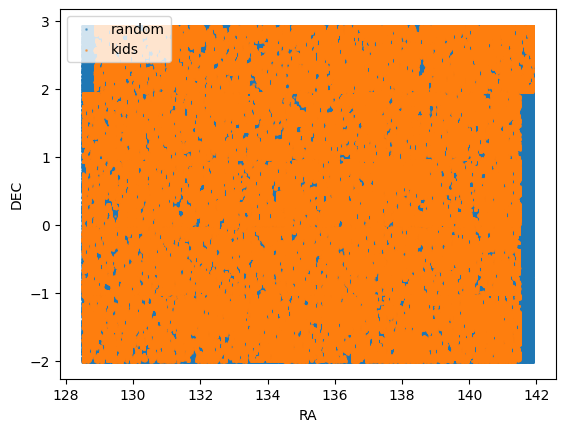

In [10]:
plt.scatter(ra_ran,dec_ran,s=1.,alpha=0.5,label='random')
plt.scatter(ra,dec,s=1.,alpha=0.5,label='kids')
plt.xlabel('RA')
plt.ylabel('DEC')
plt.legend()

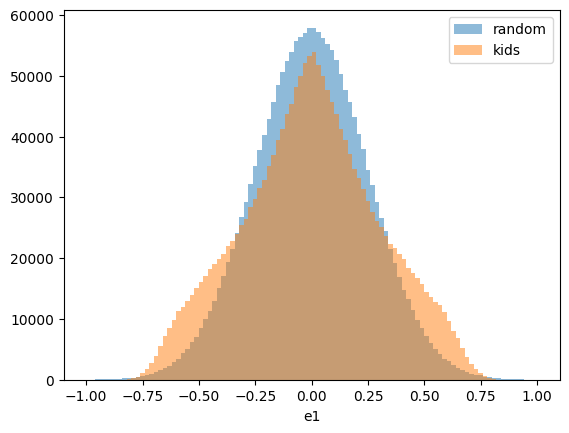

In [11]:
plt.hist(e1_ran,100,range=(-1,1),label='random',alpha=0.5)
plt.hist(e1,100,range=(-1,1),label='kids',alpha=0.5)
plt.xlabel('e1')
plt.legend()

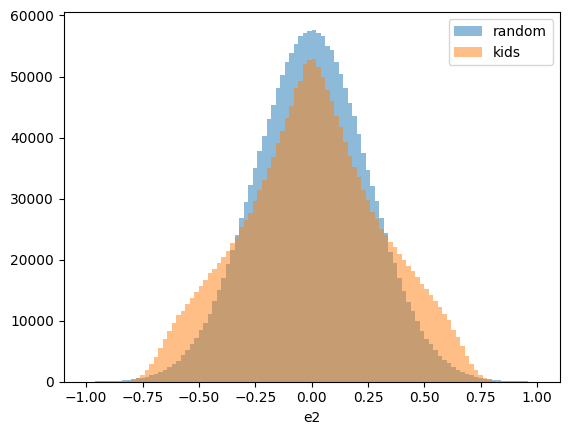

In [12]:
plt.hist(e2_ran,100,range=(-1,1),label='random',alpha=0.5)
plt.hist(e2,100,range=(-1,1),label='kids',alpha=0.5)
plt.xlabel('e2')
plt.legend()

### Let's start with some position-position correlation functions

In [13]:
## correlating randoms
nn_rand = treecorr.NNCorrelation(nbins=nbins, min_sep=min_sep, max_sep=max_sep, sep_units='arcmin')
nn_rand.process(rand_cat,rand_cat)

## correlating kids data
nn_kids = treecorr.NNCorrelation(nbins=nbins, min_sep=min_sep, max_sep=max_sep, sep_units='arcmin')
nn_kids.process(kids_cat,kids_cat)

## correlating random with kids 
nn_cross = treecorr.NNCorrelation(nbins=nbins, min_sep=min_sep, max_sep=max_sep, sep_units='arcmin')
nn_cross.process(kids_cat,rand_cat)


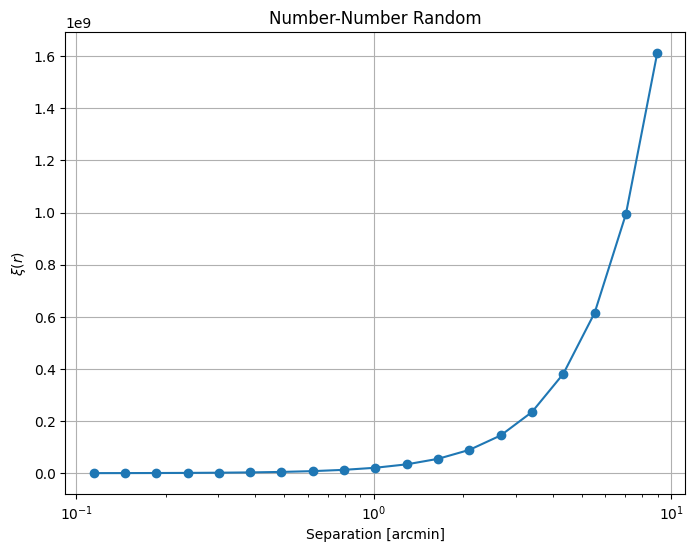

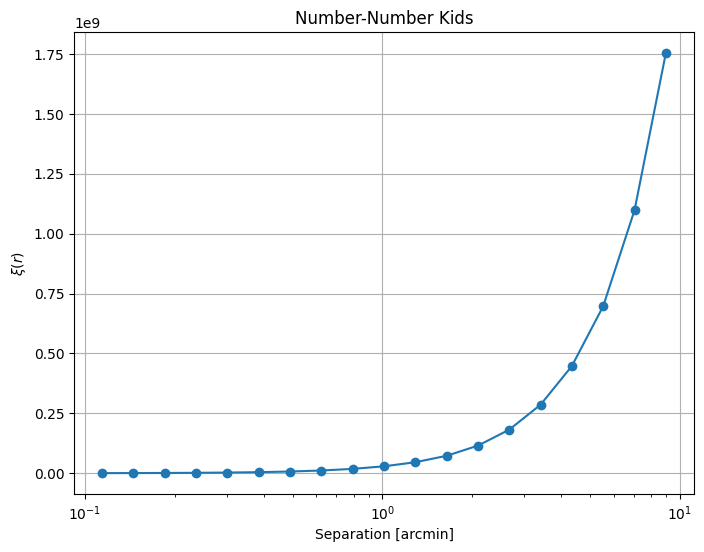

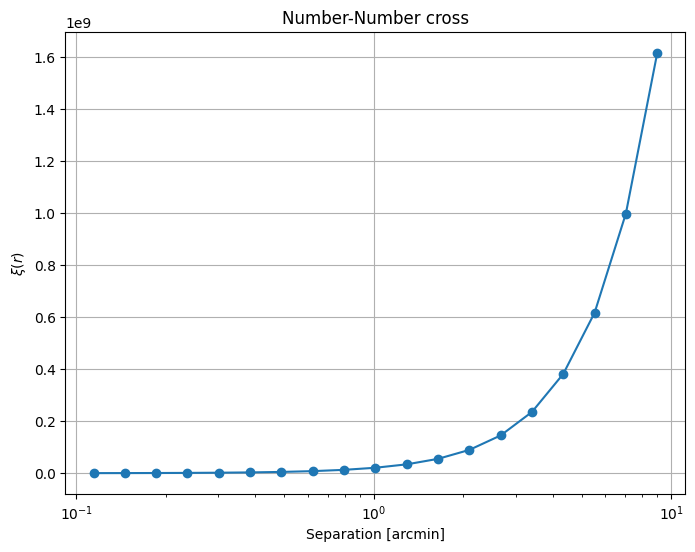

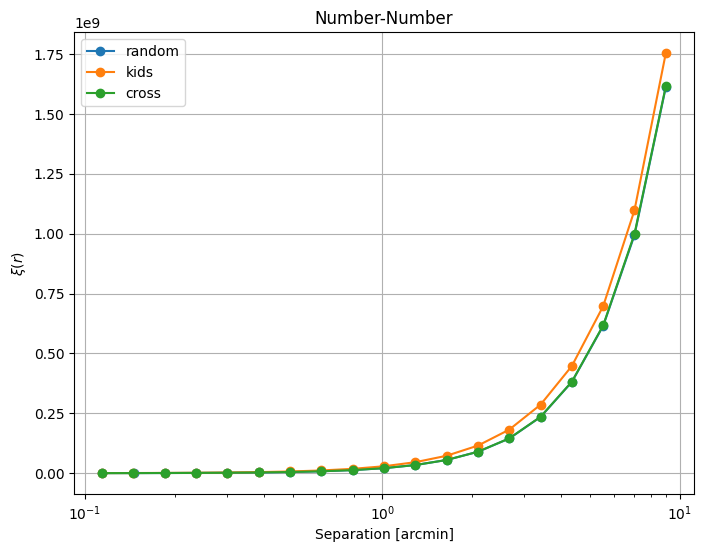

In [14]:
plot_corr(nn_rand.meanr,nn_rand.npairs,'Number-Number Random')
plot_corr(nn_kids.meanr,nn_kids.npairs,'Number-Number Kids')
plot_corr(nn_cross.meanr,nn_cross.npairs,'Number-Number cross')
plot_together([nn_rand.meanr,nn_kids.meanr,nn_cross.meanr],[nn_rand.npairs,nn_kids.npairs,nn_cross.npairs],'Number-Number')

### The leson is: geometrical effects are important in clustering, have a good random!

# Moving to Shear-Shear (Shape-Shape)

In [15]:
## correlating randoms
gg_rand = treecorr.GGCorrelation(nbins=nbins, min_sep=min_sep, max_sep=max_sep, sep_units='arcmin')
gg_rand.process(rand_cat,rand_cat)

## correlating kids data
gg_kids = treecorr.GGCorrelation(nbins=nbins, min_sep=min_sep, max_sep=max_sep, sep_units='arcmin')
gg_kids.process(kids_cat,kids_cat)

## correlating random with kids 
gg_cross = treecorr.GGCorrelation(nbins=nbins, min_sep=min_sep, max_sep=max_sep, sep_units='arcmin')
gg_cross.process(kids_cat,rand_cat)


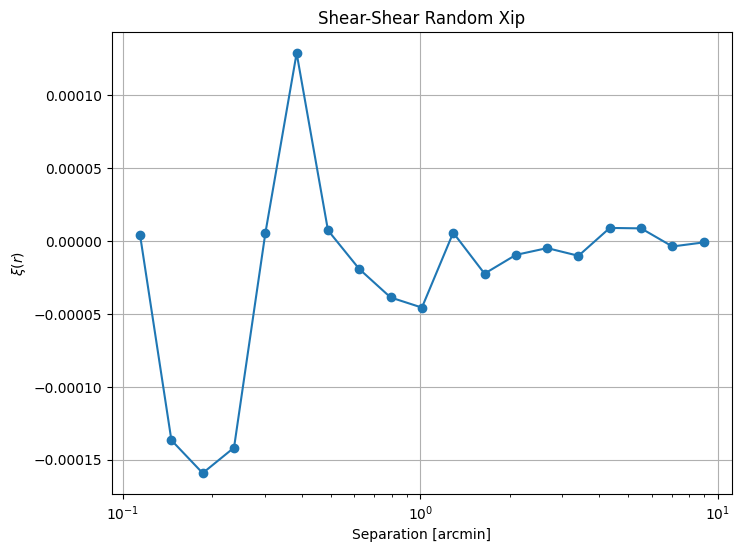

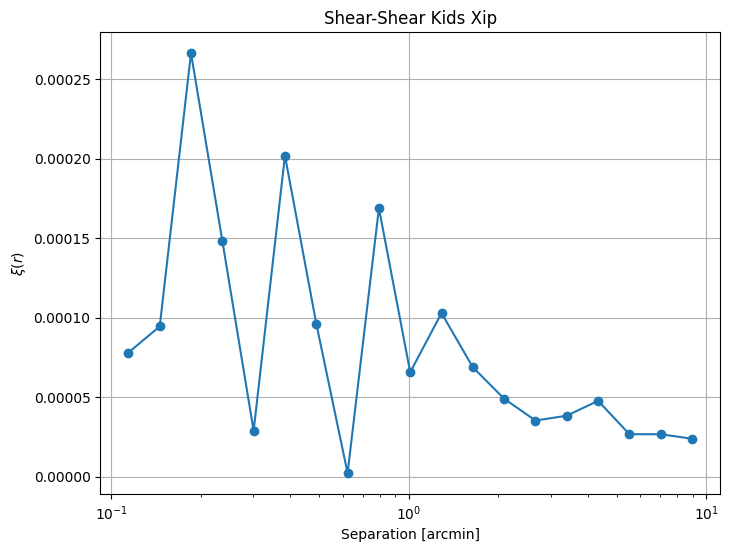

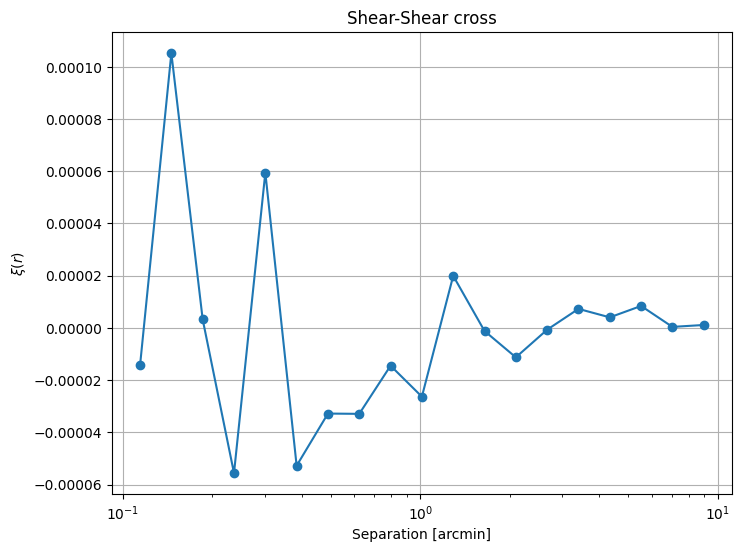

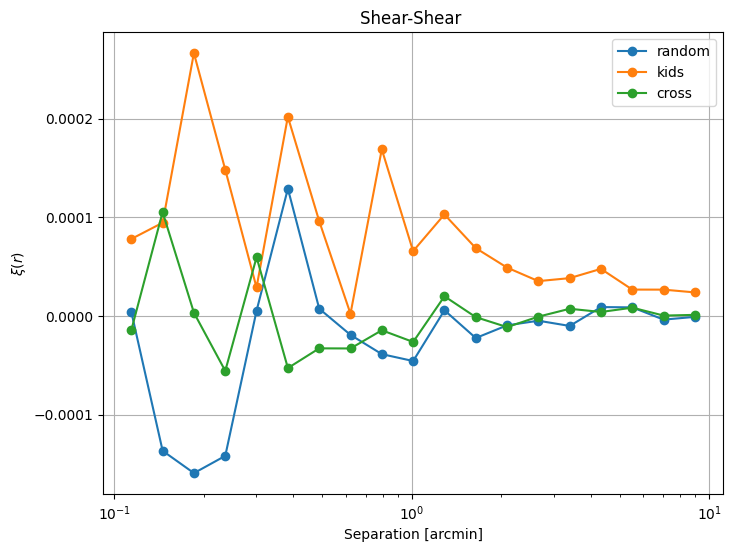

In [16]:
plot_corr(gg_rand.meanr,gg_rand.xip,'Shear-Shear Random Xip')
plot_corr(gg_kids.meanr,gg_kids.xip,'Shear-Shear Kids Xip')
plot_corr(gg_cross.meanr,gg_cross.xip,'Shear-Shear cross')
plot_together([gg_rand.meanr,gg_kids.meanr,gg_cross.meanr],[gg_rand.xip,gg_kids.xip,gg_cross.xip],'Shear-Shear ')



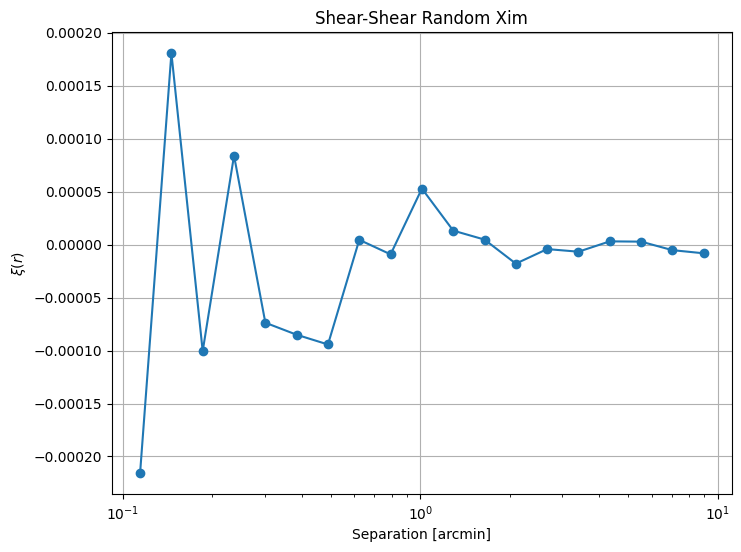

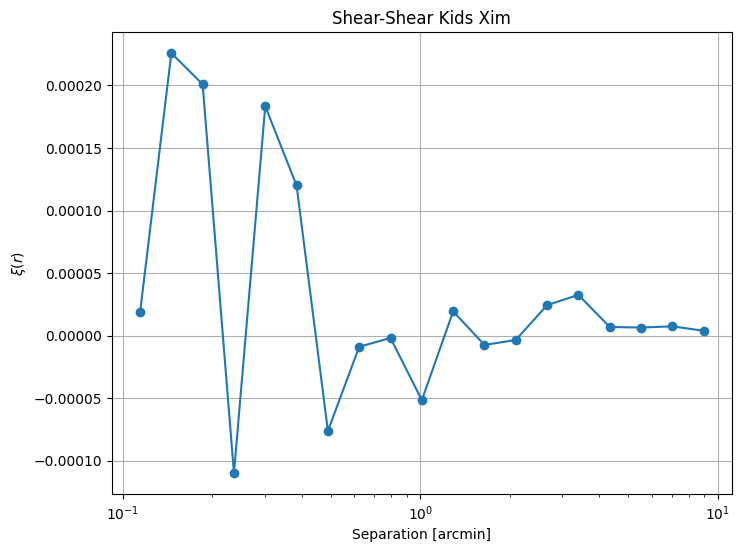

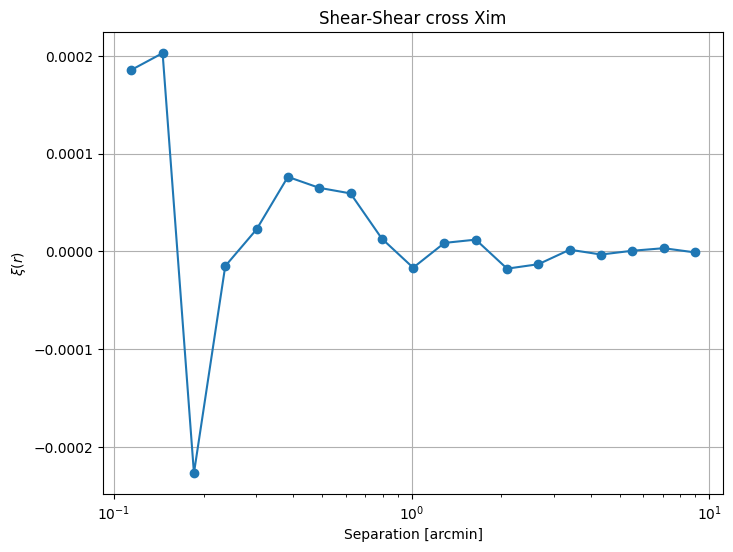

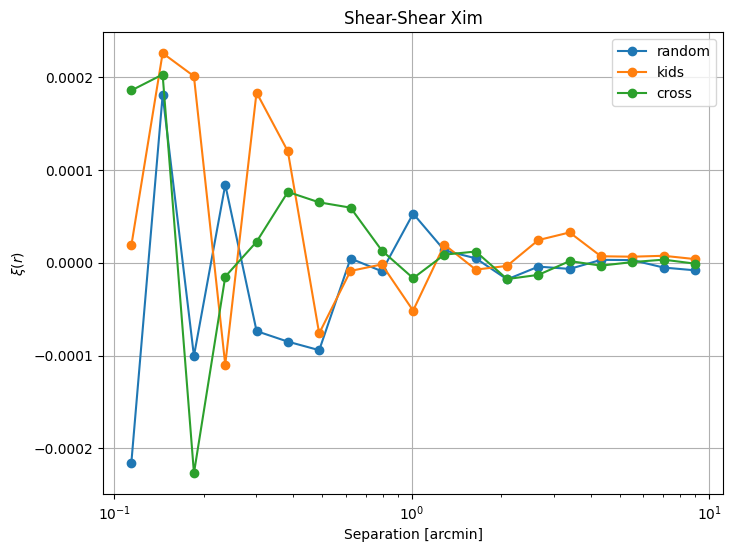

In [17]:
plot_corr(gg_rand.meanr,gg_rand.xim,'Shear-Shear Random Xim')
plot_corr(gg_kids.meanr,gg_kids.xim,'Shear-Shear Kids Xim')
plot_corr(gg_cross.meanr,gg_cross.xim,'Shear-Shear cross Xim')
plot_together([gg_rand.meanr,gg_kids.meanr,gg_cross.meanr],[gg_rand.xim,gg_kids.xim,gg_cross.xim],'Shear-Shear Xim')


#### We have learned: cosmic shear is weak, systematics are important

### Let's try Postiton-Shear

In [18]:
## correlating randoms
ng_rand = treecorr.NGCorrelation(nbins=nbins, min_sep=min_sep, max_sep=max_sep, sep_units='arcmin')
ng_rand.process(rand_cat,rand_cat)

## correlating kids data
ng_kids = treecorr.NGCorrelation(nbins=nbins, min_sep=min_sep, max_sep=max_sep, sep_units='arcmin')
ng_kids.process(kids_cat,kids_cat)

## correlating random with kids 
ng_cross = treecorr.NGCorrelation(nbins=nbins, min_sep=min_sep, max_sep=max_sep, sep_units='arcmin')
ng_cross.process(kids_cat,rand_cat)


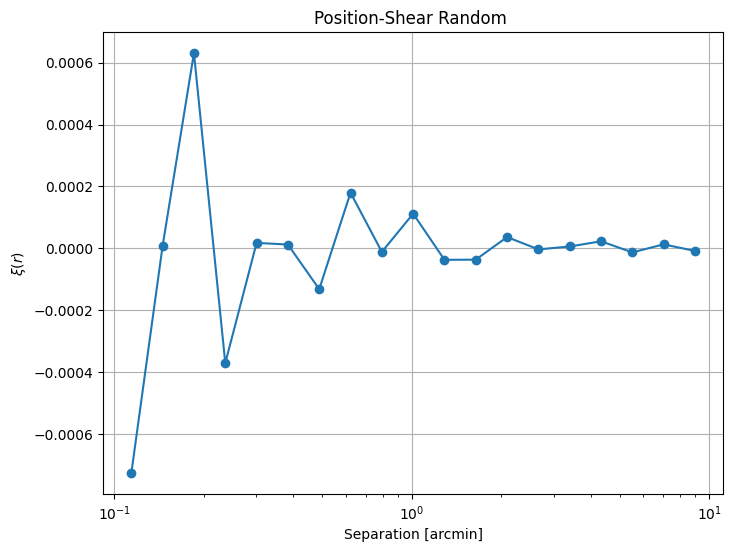

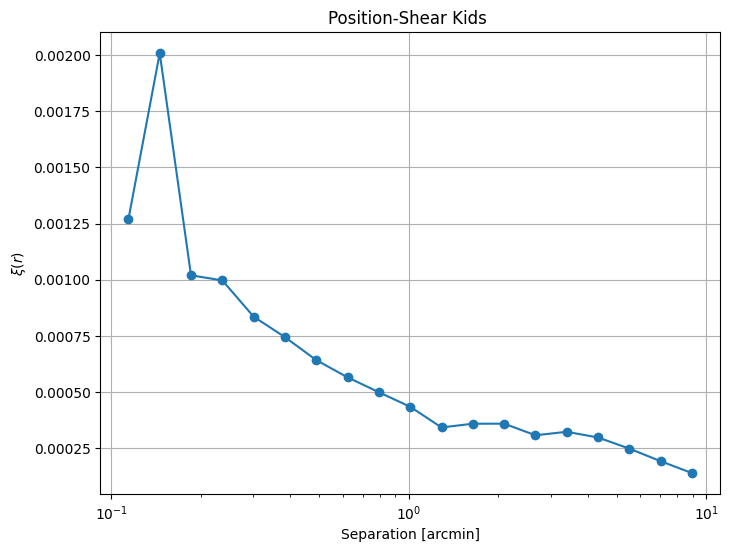

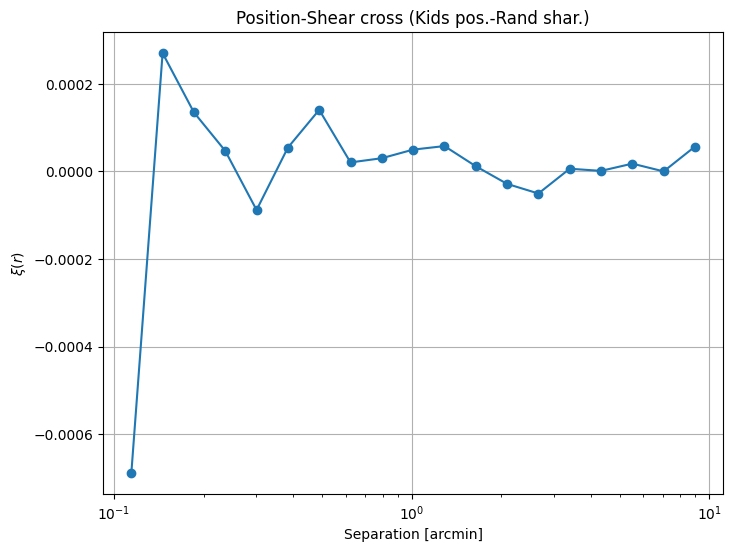

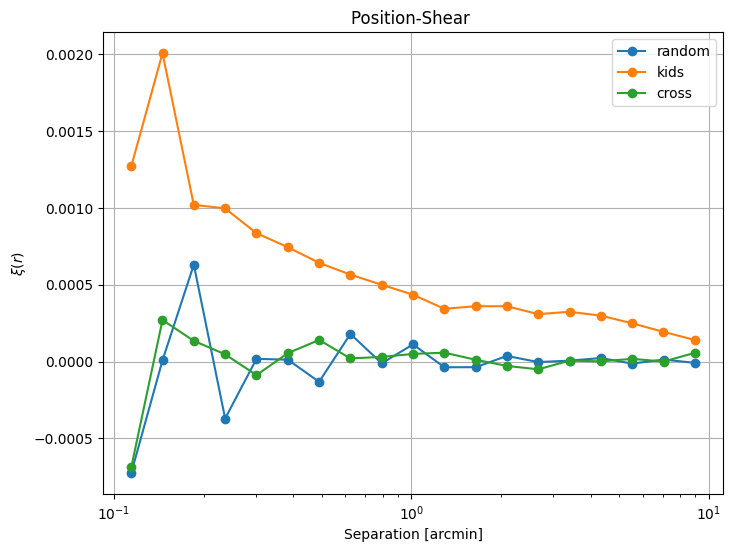

In [19]:
plot_corr(ng_rand.meanr,ng_rand.xi,'Position-Shear Random ')
plot_corr(ng_kids.meanr,ng_kids.xi,'Position-Shear Kids ')
plot_corr(ng_cross.meanr,ng_cross.xi,'Position-Shear cross (Kids pos.-Rand shar.)')
plot_together([ng_rand.meanr,ng_kids.meanr,ng_cross.meanr],[ng_rand.xi,ng_kids.xi,ng_cross.xi],'Position-Shear ')


In [20]:
ng_cross_Rand_Kids = treecorr.NGCorrelation(nbins=nbins, min_sep=min_sep, max_sep=max_sep, sep_units='arcmin')
ng_cross_Rand_Kids.process(rand_cat,kids_cat)

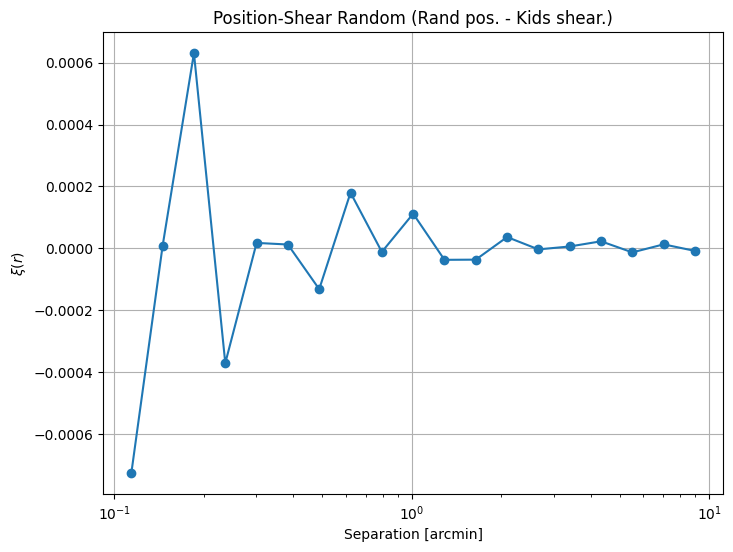

In [21]:
plot_corr(ng_rand.meanr,ng_rand.xi,'Position-Shear Random (Rand pos. - Kids shear.)')

### Final lesson:
We actually observed a lot of random fluctuations in the randoms making these exercise, the "mistake" we made is that we did not sample the randoms densily enough, as we just put the same number as the galaxy (this was for illustration). Therefre a random will typically be 10 to 100x denser then the actual catalog